In [0]:
%reload_ext autoreload
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir Data
!unzip '/content/gdrive/My Drive/ASL-alphabet.zip' -d Data 

Archive:  /content/gdrive/My Drive/ASL-alphabet.zip
  inflating: Data/asl_alphabet_test/asl_alphabet_test/A_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/B_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/C_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/D_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/E_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/F_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/G_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/H_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/I_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/J_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/K_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/L_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/M_test.jpg  
  inflating: Data/asl_alphabet_test/asl_alphabet_test/N_test.jpg  
  inflatin

In [0]:
path = "/content/Data"
train_set = "/content/Data/asl_alphabet_train/asl_alphabet_train"
test_set = "/content/Data/asl_alphabet_test/asl_alphabet_test"

In [0]:
dataset = ImageDataBunch.from_folder(path,
                                     train=train_set,
                                     valid_pct=0.2,
                                     test=test_set,
                                     ds_tfms=get_transforms(),size=224, num_workers=6).normalize(imagenet_stats)

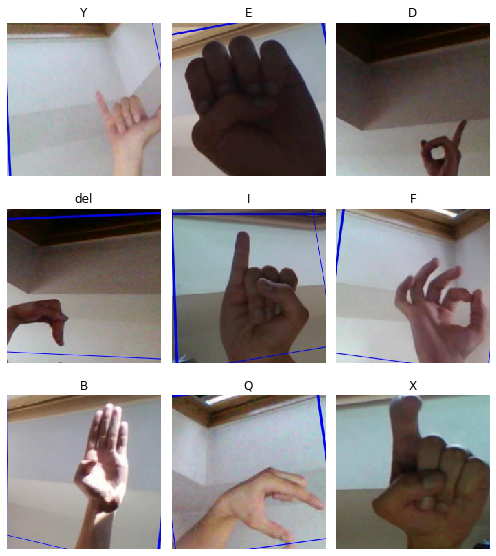

In [0]:
dataset.show_batch(rows=3, figsize=(7,8))

In [0]:
print(len(dataset.classes))

29


In [0]:
dataset.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [0]:
len(dataset.train_ds),len(dataset.valid_ds)

(69600, 17400)

##Resnet34

In [0]:
learner = cnn_learner(dataset, models.resnet34, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 51.1MB/s]


In [0]:
learner.fit_one_cycle(2)

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


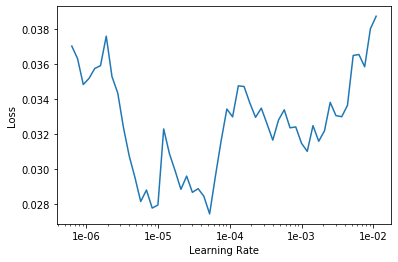

In [0]:
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(5, slice(1e-03))

In [0]:
learner.save('stage-1')

##Resnet50:

In [0]:
learner50 = cnn_learner(dataset, models.resnet50, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 84.9MB/s]


In [22]:
learner50.fit_one_cycle(1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


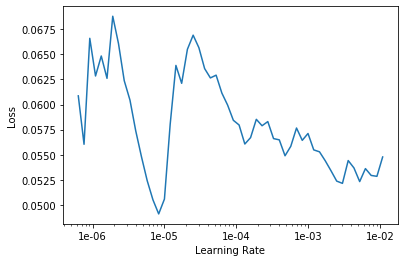

In [23]:
learner50.lr_find()
learner50.recorder.plot()

In [26]:
learner50.fit_one_cycle(6,slice(1e-04))

In [0]:
learner50.save('stage-2')

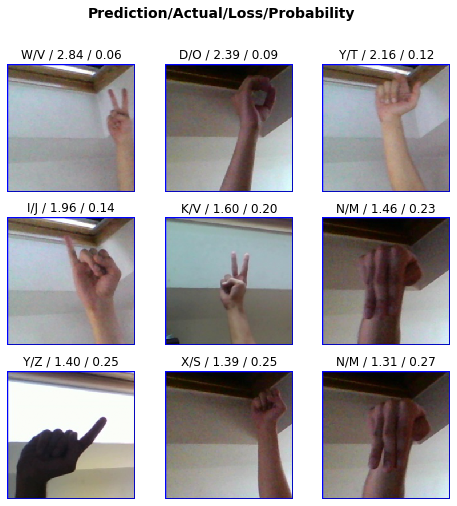

In [28]:
interp = ClassificationInterpretation.from_learner(learner50)
interp.plot_top_losses(9,figsize=(8,8))

In [30]:
interp.most_confused(min_val=1)

[('M', 'N', 3),
 ('V', 'K', 2),
 ('J', 'I', 1),
 ('O', 'D', 1),
 ('S', 'X', 1),
 ('T', 'Y', 1),
 ('V', 'W', 1),
 ('Z', 'Y', 1)]

In [0]:
learner50.export()

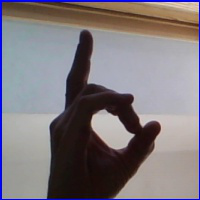

In [48]:
img = open_image('/content/Data/asl_alphabet_test/asl_alphabet_test/D_test.jpg')
img

In [49]:
pred_class,pred_index,outputs = learner50.predict(img)
pred_class

Category D

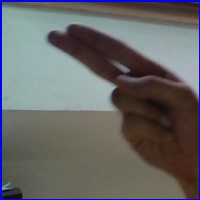

In [50]:
img = open_image('/content/Data/asl_alphabet_test/asl_alphabet_test/H_test.jpg')
img

In [51]:
pred_class,pred_index,outputs = learner50.predict(img)
pred_class

Category H

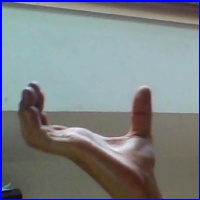

In [53]:
img = open_image('/content/Data/asl_alphabet_test/asl_alphabet_test/space_test.jpg')
img

In [54]:
pred_class,pred_index,outputs = learner50.predict(img)
pred_class

Category space